# test SpectrUtils

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 14th 2021
- update : April 14th 2021
- version 1

### Specutils

https://specutils.readthedocs.io/en/stable/index.html

### Equivalent width
https://specutils.readthedocs.io/en/stable/api/specutils.analysis.equivalent_width.html#specutils.analysis.equivalent_width


### Installation

https://specutils.readthedocs.io/en/stable/installation.html

# Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
from astropy.io import fits

from astropy import units as u
from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fdf2dba2ac0>

In [4]:
f = fits.open('https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits')  

# The spectrum is in the second HDU of this file.

specdata = f[1].data 

f.close() 

In [5]:
from specutils import Spectrum1D

lamb = 10**specdata['loglam'] * u.AA 

flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 

spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

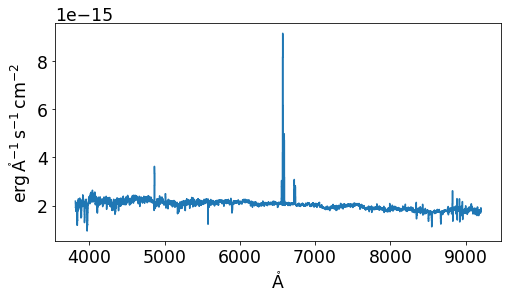

In [10]:
f, ax = plt.subplots()  

ax.step(spec.spectral_axis, spec.flux) 

In [15]:
from specutils.fitting import fit_generic_continuum
g1_fit = fit_generic_continuum(spec)


In [16]:
y_continuum_fitted = g1_fit(spec.spectral_axis)

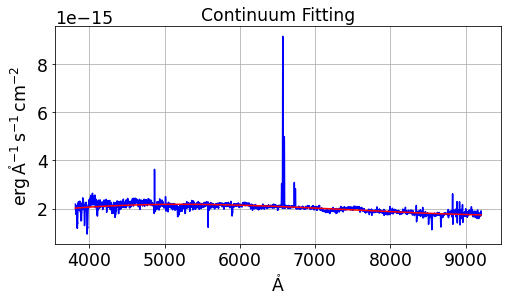

In [18]:
f, ax = plt.subplots()  

ax.plot(spec.spectral_axis, spec.flux,'b-')  

ax.plot(spec.spectral_axis, y_continuum_fitted,'r-')  

ax.set_title("Continuum Fitting")  

ax.grid(True)  

In [19]:
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 

(6539.999999999999, 6599.999999999999)

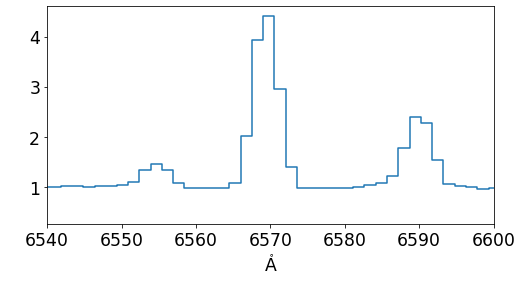

In [20]:
f, ax = plt.subplots()  

ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)  

ax.set_xlim(654 * u.nm, 660 * u.nm)  

In [21]:
from specutils import SpectralRegion

from specutils.analysis import equivalent_width

equivalent_width(cont_norm_spec, regions=SpectralRegion(6562 * u.AA, 6575 * u.AA))

<Quantity -16.25232187 Angstrom>